In [20]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import imutils
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [21]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [22]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [23]:
def draw_styled_landmarks(image, results):    
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(89,122,255), thickness=1, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(29,226,200), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(29,226,200), thickness=1, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(153,255,51), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(153,51,255), thickness=1, circle_radius=2)
                                 )

In [24]:
# IGNORE
cap = cv2.VideoCapture(0)

# Set mediapipe model, if you want higher or lower, change confidence number
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [25]:
draw_styled_landmarks(frame, results)

In [26]:
# IGNORE
results

mediapipe.python.solution_base.SolutionOutputs

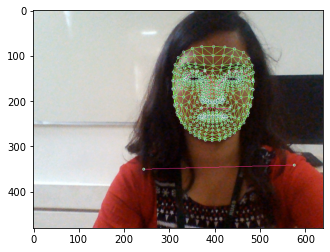

In [27]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [28]:
# IGNORE
cap = cv2.VideoCapture(0)
while cap.isOpened():
    
    # Read Feed
    ret, frame = cap.read()
    
    # Show to Screen
    cv2.imshow('OpenCV Feed', frame)
    
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [29]:
# IGNORE
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [30]:
# IGNORE
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [31]:
pose

array([ 6.32927954e-01,  3.58464926e-01, -1.89502108e+00,  9.99633014e-01,
        6.75517261e-01,  2.79381633e-01, -1.81202567e+00,  9.99460220e-01,
        7.00966835e-01,  2.79509276e-01, -1.81248665e+00,  9.99363899e-01,
        7.19795108e-01,  2.80601561e-01, -1.81253433e+00,  9.99330342e-01,
        5.93402267e-01,  2.79183865e-01, -1.82157958e+00,  9.99521375e-01,
        5.67627549e-01,  2.79523998e-01, -1.82188737e+00,  9.99502838e-01,
        5.51101327e-01,  2.81213820e-01, -1.82246590e+00,  9.99563038e-01,
        7.58724809e-01,  3.20514053e-01, -1.20868349e+00,  9.99177575e-01,
        5.20418763e-01,  3.20036501e-01, -1.24095762e+00,  9.99662220e-01,
        6.79467082e-01,  4.51245636e-01, -1.66085851e+00,  9.99539614e-01,
        5.82150996e-01,  4.48997378e-01, -1.67224884e+00,  9.99638498e-01,
        9.01527882e-01,  7.12389350e-01, -7.31141150e-01,  9.81051624e-01,
        3.82267654e-01,  7.31053114e-01, -7.91877329e-01,  9.82050419e-01,
        1.14082015e+00,  

In [32]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [33]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('FinalA-L') 

# Actions that we try to detect
actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L'])

# Five videos worth of data
no_sequences = 5

# Videos are going to be 5 frames in length
sequence_length = 5

In [34]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [35]:
# IGNORE
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    for action in actions:
        # Loop through sequences aka videos : 20 Videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length : 5 Frames
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                frame = imutils.resize(frame,width = 500,height = 1000)

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(5000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [36]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11}

In [37]:
sequences, labels = [], []
no_sequences = 5
sequence_length = 5
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape
X_train.shape

(57, 5, 1662)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(5,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
2/2 [==============================] - 7s 169ms/step - loss: 2.4882 - categorical_accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 85ms/step - loss: 2.4861 - categorical_accuracy: 0.0702
Epoch 3/500
2/2 [==============================] - 0s 100ms/step - loss: 2.4819 - categorical_accuracy: 0.0877
Epoch 4/500
2/2 [==============================] - 0s 85ms/step - loss: 2.4750 - categorical_accuracy: 0.0877
Epoch 5/500
2/2 [==============================] - 0s 63ms/step - loss: 2.4573 - categorical_accuracy: 0.0877
Epoch 6/500
2/2 [==============================] - 0s 69ms/step - loss: 2.4507 - categorical_accuracy: 0.0877
Epoch 7/500
2/2 [==============================] - 0s 69ms/step - loss: 2.4169 - categorical_accuracy: 0.1579
Epoch 8/500
2/2 [==============================] - 0s 85ms/step - loss: 2.3985 - categorical_accuracy: 0.1579
Epoch 9/500
2/2 [==============================] - 0s 53ms/step - loss: 2.3708 - categorical_accuracy: 0.1754
Epoc

2/2 [==============================] - 0s 78ms/step - loss: 0.9678 - categorical_accuracy: 0.5965
Epoch 75/500
2/2 [==============================] - 0s 69ms/step - loss: 1.0782 - categorical_accuracy: 0.6140
Epoch 76/500
2/2 [==============================] - 0s 63ms/step - loss: 0.8784 - categorical_accuracy: 0.6667
Epoch 77/500
2/2 [==============================] - 0s 63ms/step - loss: 0.9803 - categorical_accuracy: 0.5614
Epoch 78/500
2/2 [==============================] - 0s 69ms/step - loss: 0.9254 - categorical_accuracy: 0.5614
Epoch 79/500
2/2 [==============================] - 0s 85ms/step - loss: 0.7820 - categorical_accuracy: 0.6491
Epoch 80/500
2/2 [==============================] - 0s 69ms/step - loss: 0.8524 - categorical_accuracy: 0.6316
Epoch 81/500
2/2 [==============================] - 0s 85ms/step - loss: 0.7058 - categorical_accuracy: 0.7368
Epoch 82/500
2/2 [==============================] - 0s 85ms/step - loss: 0.8434 - categorical_accuracy: 0.6491
Epoch 83/500
2

2/2 [==============================] - 0s 62ms/step - loss: 0.1579 - categorical_accuracy: 0.9123
Epoch 148/500
2/2 [==============================] - 0s 100ms/step - loss: 0.2685 - categorical_accuracy: 0.8596
Epoch 149/500
2/2 [==============================] - 0s 69ms/step - loss: 0.3646 - categorical_accuracy: 0.9123
Epoch 150/500
2/2 [==============================] - 0s 63ms/step - loss: 0.2963 - categorical_accuracy: 0.8772
Epoch 151/500
2/2 [==============================] - 0s 53ms/step - loss: 0.4245 - categorical_accuracy: 0.8070
Epoch 152/500
2/2 [==============================] - 0s 69ms/step - loss: 0.3809 - categorical_accuracy: 0.8246
Epoch 153/500
2/2 [==============================] - 0s 69ms/step - loss: 0.6170 - categorical_accuracy: 0.7544
Epoch 154/500
2/2 [==============================] - 0s 63ms/step - loss: 1.4790 - categorical_accuracy: 0.5789
Epoch 155/500
2/2 [==============================] - 0s 63ms/step - loss: 1.5580 - categorical_accuracy: 0.5614
Epoch

2/2 [==============================] - 0s 63ms/step - loss: 0.0471 - categorical_accuracy: 0.9825
Epoch 221/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0253 - categorical_accuracy: 1.0000
Epoch 222/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0506 - categorical_accuracy: 0.9825
Epoch 223/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0245 - categorical_accuracy: 1.0000
Epoch 224/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0454 - categorical_accuracy: 0.9825
Epoch 225/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0468 - categorical_accuracy: 0.9825
Epoch 226/500
2/2 [==============================] - 0s 53ms/step - loss: 0.0201 - categorical_accuracy: 1.0000
Epoch 227/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0803 - categorical_accuracy: 0.9649
Epoch 228/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0686 - categorical_accuracy: 0.9649
Epoch 

2/2 [==============================] - 0s 63ms/step - loss: 0.0257 - categorical_accuracy: 0.9825
Epoch 294/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0199 - categorical_accuracy: 1.0000
Epoch 295/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0341 - categorical_accuracy: 0.9825
Epoch 296/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0158 - categorical_accuracy: 1.0000
Epoch 297/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0231 - categorical_accuracy: 0.9825
Epoch 298/500
2/2 [==============================] - 0s 85ms/step - loss: 0.0244 - categorical_accuracy: 0.9825
Epoch 299/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0142 - categorical_accuracy: 1.0000
Epoch 300/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0381 - categorical_accuracy: 0.9825
Epoch 301/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0151 - categorical_accuracy: 1.0000
Epoch 

2/2 [==============================] - 0s 69ms/step - loss: 6.7940e-04 - categorical_accuracy: 1.0000
Epoch 366/500
2/2 [==============================] - 0s 78ms/step - loss: 6.4590e-04 - categorical_accuracy: 1.0000
Epoch 367/500
2/2 [==============================] - 0s 69ms/step - loss: 6.1752e-04 - categorical_accuracy: 1.0000
Epoch 368/500
2/2 [==============================] - 0s 85ms/step - loss: 6.0432e-04 - categorical_accuracy: 1.0000
Epoch 369/500
2/2 [==============================] - 0s 85ms/step - loss: 6.0690e-04 - categorical_accuracy: 1.0000
Epoch 370/500
2/2 [==============================] - 0s 53ms/step - loss: 5.7454e-04 - categorical_accuracy: 1.0000
Epoch 371/500
2/2 [==============================] - 0s 69ms/step - loss: 5.7141e-04 - categorical_accuracy: 1.0000
Epoch 372/500
2/2 [==============================] - 0s 69ms/step - loss: 5.4919e-04 - categorical_accuracy: 1.0000
Epoch 373/500
2/2 [==============================] - 0s 169ms/step - loss: 5.3471e-04 

2/2 [==============================] - 0s 78ms/step - loss: 1.7460e-04 - categorical_accuracy: 1.0000
Epoch 436/500
2/2 [==============================] - 0s 78ms/step - loss: 1.7272e-04 - categorical_accuracy: 1.0000
Epoch 437/500
2/2 [==============================] - 0s 69ms/step - loss: 1.6988e-04 - categorical_accuracy: 1.0000
Epoch 438/500
2/2 [==============================] - 0s 63ms/step - loss: 1.6740e-04 - categorical_accuracy: 1.0000
Epoch 439/500
2/2 [==============================] - 0s 78ms/step - loss: 1.6489e-04 - categorical_accuracy: 1.0000
Epoch 440/500
2/2 [==============================] - 0s 69ms/step - loss: 1.6395e-04 - categorical_accuracy: 1.0000
Epoch 441/500
2/2 [==============================] - 0s 53ms/step - loss: 1.6129e-04 - categorical_accuracy: 1.0000
Epoch 442/500
2/2 [==============================] - 0s 69ms/step - loss: 1.5950e-04 - categorical_accuracy: 1.0000
Epoch 443/500
2/2 [==============================] - 0s 62ms/step - loss: 1.5706e-04 -

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             442112    
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 12)                396       
                                                                 
Total params: 596,972
Trainable params: 596,972
Non-trai

In [42]:
res = model.predict(X_test)

model.save('action2.h5')

In [43]:
model.load_weights('action2.h5')

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
# IGNORE
#multilabel_confusion_matrix??

# [True Negative][False Positive]
# [False Negative][True Postive]
multilabel_confusion_matrix(ytrue,yhat)

array([[[2, 1],
        [0, 0]],

       [[2, 0],
        [0, 1]],

       [[1, 0],
        [1, 1]]], dtype=int64)

In [45]:
accuracy_score(ytrue, yhat)

0.6666666666666666

In [46]:
from scipy import stats
colors = [(245,117,16), (117,245,16), (16,117,245), (116,127,145), (10,287,15),(12,267,125),(1,234,235)
          ,(10,145,189),(24,165,134),(145,146,147),(234,215,217),(123,124,125),(145,156,100),(130,100,179)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [47]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # Resize Feed to be bigger
        frame = imutils.resize(frame,width = 1000,height = 1000)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-5:]
        
        if len(sequence) == 5:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-5:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (1,0), (700, 40), (245, 117, 16), -1)
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('m'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [39]:
# IGNORE
# Call If webcame is still Focused
cap.release()
cv2.destroyAllWindows()

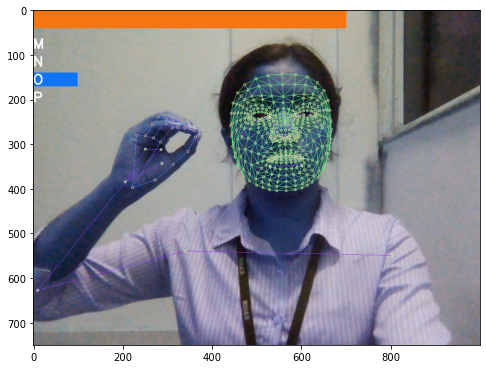

In [40]:
plt.figure(figsize=(8,8))
plt.imshow(prob_viz(res, actions, image, colors))